In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
# Data_path = r'E:\sudeep_work\kaggle\data\village_career'
Data_path = r'D:\sudeep_work\nlp\data\village_carrier'


In [3]:
students = pd.read_csv(os.path.join(Data_path,"students.csv"), parse_dates = ['students_date_joined'])
professionals = pd.read_csv(os.path.join(Data_path,"professionals.csv"), parse_dates = ['professionals_date_joined'])
emails = pd.read_csv(os.path.join(Data_path,"emails.csv"), index_col = "emails_id")
questions = pd.read_csv(os.path.join(Data_path,"questions.csv"), parse_dates = ['questions_date_added'])
answers = pd.read_csv(os.path.join(Data_path,"answers.csv"), parse_dates = ["answers_date_added"])
tag_questions = pd.read_csv(os.path.join(Data_path,"tag_questions.csv"))
tags = pd.read_csv(os.path.join(Data_path,"tags.csv"))
matches = pd.read_csv(os.path.join(Data_path,"matches.csv"))

# Exploratory data analysis

student_analysis

In [4]:
students.head()
students.rename(columns={'students_id': 'user_id',
                        'students_location':'location',
                        'students_date_joined':'date_joined'}, inplace=True)
students['ocuuption'] = ['student' for i in range(len(students))]

print(students.shape)
print(students.head())
print(students.info())
# students.students_id.nunique()
# 

(30971, 4)
                            user_id location         date_joined ocuuption
0  12a89e96755a4dba83ff03e03043d9c0      NaN 2011-12-16 14:19:24   student
1  e37a5990fe354c60be5e87376b08d5e3      NaN 2011-12-27 03:02:44   student
2  12b402cceeda43dcb6e12ef9f2d221ea      NaN 2012-01-01 05:00:00   student
3  a0f431fc79794edcb104f68ce55ab897      NaN 2012-01-01 05:00:00   student
4  23aea4702d804bd88d1e9fb28074a1b4      NaN 2012-01-01 05:00:00   student
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 4 columns):
user_id        30971 non-null object
location       28938 non-null object
date_joined    30971 non-null datetime64[ns]
ocuuption      30971 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 967.9+ KB
None


In [5]:
students_locations = students.location.value_counts().sort_values(ascending = False).head(20)
students_locations

New York, New York             1313
Bengaluru, Karnataka, India     890
Los Angeles, California         663
Hyderabad, Telangana, India     597
Boston, Massachusetts           557
San Francisco, California       550
San Jose, California            548
Houston, Texas                  476
Chennai, Tamil Nadu, India      437
Chicago, Illinois               344
Oakland, California             261
San Antonio, Texas              202
Dallas, Texas                   197
Owensboro, Kentucky             196
Providence, Rhode Island        187
Lakeland, Florida               177
Pittsburgh, Pennsylvania        170
Irving, Texas                   166
Miami, Florida                  161
Atlanta, Georgia                160
Name: location, dtype: int64

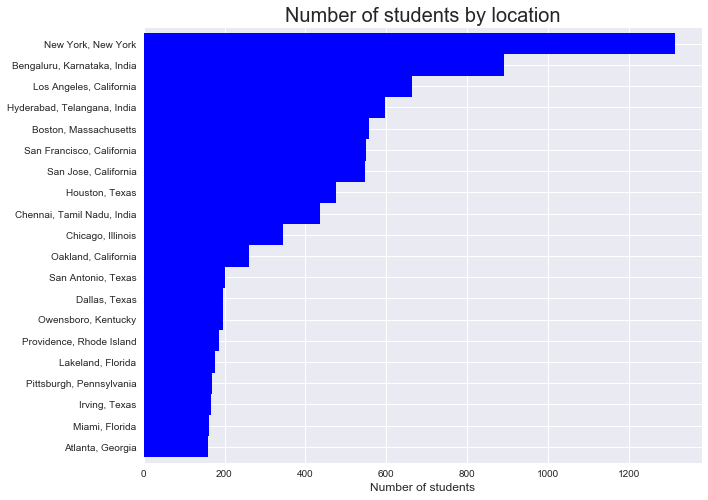

In [7]:
students_locations.sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'b', width =1)
plt.title("Number of students by location", fontsize=20)
plt.xlabel('Number of students', fontsize=12)
plt.show()

In [8]:
students['location'].isnull().sum()

2033

professional analysis

In [9]:

professionals.rename(columns={'professionals_id': 'user_id',
                              'professionals_location':'location',
                              'professionals_date_joined':'date_joined'}, inplace=True)
professionals['ocuuption'] = ['professional' for i in range(len(professionals))]


print(professionals.shape)
print(professionals.head())
print(professionals.info())

(28152, 6)
                            user_id               location  \
0  9ced4ce7519049c0944147afb75a8ce3                    NaN   
1  f718dcf6d2ec4cb0a52a9db59d7f9e67                    NaN   
2  0c673e046d824ec0ad0ebe012a0673e4     New York, New York   
3  977428d851b24183b223be0eb8619a8c  Boston, Massachusetts   
4  e2d57e5041a44f489288397c9904c2b2                    NaN   

  professionals_industry professionals_headline         date_joined  \
0                    NaN                    NaN 2011-10-05 20:35:19   
1                    NaN                    NaN 2011-10-05 20:49:21   
2                    NaN                    NaN 2011-10-18 17:31:26   
3                    NaN                    NaN 2011-11-09 20:39:29   
4                    NaN                    NaN 2011-12-10 22:14:44   

      ocuuption  
0  professional  
1  professional  
2  professional  
3  professional  
4  professional  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data 

In [10]:
professionals_locations = professionals.location.value_counts().sort_values(ascending= False).head(20)
print(professionals_locations)
professionals_industry = professionals.professionals_industry.value_counts().sort_values(ascending= False).head(20)
print(professionals_industry)

New York, New York             1337
California, California          864
Greater New York City Area      745
Boston, Massachusetts           714
Los Angeles, California         617
Atlanta, Georgia                578
Chicago, Illinois               576
Austin, Texas                   574
Houston, Texas                  556
San Francisco Bay Area          513
San Francisco, California       425
Philadelphia, Pennsylvania      394
Bengaluru, Karnataka, India     394
Greater Atlanta Area            383
Dallas/Fort Worth Area          368
Greater Los Angeles Area        364
Washington                      318
Greater Chicago Area            298
Houston, Texas Area             282
Greater Boston Area             280
Name: location, dtype: int64
Telecommunications                      3166
Information Technology and Services     2109
Computer Software                       1272
Hospital and Health Care                 862
Higher Education                         800
Accounting                

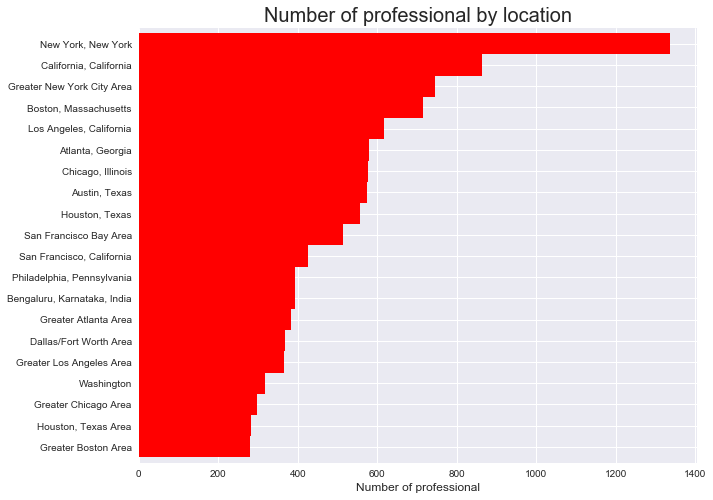

2033


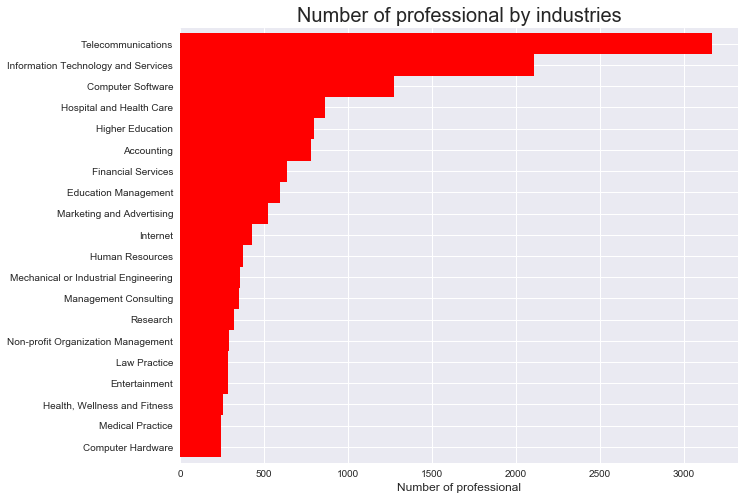

2576


In [13]:
professionals_locations.sort_values(ascending = True).plot.barh(figsize = (10,8),color = 'r', width = 1)
plt.title("Number of professional by location", fontsize=20)
plt.xlabel('Number of professional', fontsize = 12)
plt.show()

print(students.location.isnull().sum())

professionals_industry.sort_values(ascending = True).plot.barh(figsize = (10,8),color = 'r', width = 1)
plt.title("Number of professional by industries", fontsize=20)
plt.xlabel('Number of professional', fontsize = 12)
plt.show()
print(professionals.professionals_industry.isnull().sum())

In [14]:
professionals.professionals_headline.sample(20)

20342                        Dj/MC at After School Matters
2215               Software Engineer at Cerner Corporation
383                                                    NaN
13054                    Senior Assurance Associate at PwC
28080                                                  NaN
10630    Seeking a Global Business Development Position...
12751    Broadcast Journalist / News Anchor / Videographer
6757         Director, Pricing Transformation at Dell, Inc
12358                                                  NaN
10968    Process Engineer at MKEC Engineering Consultan...
103                        Engineering, Program Management
24366              Volunteer Facilitator at ReadySetWorkNg
11075                          Director of Human Resources
7744                                         Stay positive
23697                                                  NaN
19194                   Senior Tax Associate at PwC Canada
1074                        Marketing Professional/Actre

questions analysis

In [15]:
print(questions.shape)
print(questions.head())
print(questions.info())

(23931, 5)
                       questions_id               questions_author_id  \
0  332a511f1569444485cf7a7a556a5e54  8f6f374ffd834d258ab69d376dd998f5   
1  eb80205482e4424cad8f16bc25aa2d9c  acccbda28edd4362ab03fb8b6fd2d67b   
2  4ec31632938a40b98909416bdd0decff  f2c179a563024ccc927399ce529094b5   
3  2f6a9a99d9b24e5baa50d40d0ba50a75  2c30ffba444e40eabb4583b55233a5a4   
4  5af8880460c141dbb02971a1a8369529  aa9eb1a2ab184ebbb00dc01ab663428a   

  questions_date_added                                    questions_title  \
0  2016-04-26 11:14:26                        Teacher   career   question   
1  2016-05-20 16:48:25  I want to become an army officer. What can I d...   
2  2017-02-08 19:13:38  Will going abroad for your first job increase ...   
3  2017-09-01 14:05:32  To become a specialist in business  management...   
4  2017-09-01 02:36:54  Are there any scholarships out there for stude...   

                                      questions_body  
0  What  is  a  maths  teacher? 

In [16]:
questions.questions_author_id.nunique()

12329

In [17]:
questions.rename(columns={'questions_author_id': 'user_id'
                         }, inplace=True)
question_database = pd.merge( questions,students,on = 'user_id', how = 'left')
question_database.info()
question_database.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 8 columns):
questions_id            23931 non-null object
user_id                 23931 non-null object
questions_date_added    23931 non-null datetime64[ns]
questions_title         23931 non-null object
questions_body          23931 non-null object
location                23017 non-null object
date_joined             23801 non-null datetime64[ns]
ocuuption               23801 non-null object
dtypes: datetime64[ns](2), object(6)
memory usage: 1.6+ MB


,questions_id,user_id,questions_date_added,questions_title,questions_body,location,date_joined,ocuuption
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32,student
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,"Providence, Rhode Island",2016-05-20 16:29:08,student
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,NaN,2017-02-07 15:51:57,student
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,"North Lauderdale, Florida",2017-09-01 14:02:02,student
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,"Tunnel Hill, Georgia",2017-09-01 02:29:06,student


answers analysis

In [18]:
print(answers.shape)
print(answers.head())
print(answers.info())

(51123, 5)
                         answers_id                 answers_author_id  \
0  4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
1  ada720538c014e9b8a6dceed09385ee3  2aa47af241bf42a4b874c453f0381bd4   
2  eaa66ef919bc408ab5296237440e323f  cbd8f30613a849bf918aed5c010340be   
3  1a6b3749d391486c9e371fbd1e605014  7e72a630c303442ba92ff00e8ea451df   
4  5229c514000446d582050f89ebd4e184  17802d94699140b0a0d2995f30c034c6   

                answers_question_id  answers_date_added  \
0  332a511f1569444485cf7a7a556a5e54 2016-04-29 19:40:14   
1  eb80205482e4424cad8f16bc25aa2d9c 2018-05-01 14:19:08   
2  eb80205482e4424cad8f16bc25aa2d9c 2018-05-02 02:41:02   
3  4ec31632938a40b98909416bdd0decff 2017-05-10 19:00:47   
4  2f6a9a99d9b24e5baa50d40d0ba50a75 2017-10-13 22:07:33   

                                        answers_body  
0  <p>Hi!</p>\n<p>You are asking a very interesti...  
1  <p>Hi. I joined the Army after I attended coll...  
2  <p>Dear Priyanka,</p><p>Gre

In [19]:
answers.rename(columns={'answers_author_id': 'user_id',
                        'answers_question_id' : 'questions_id',
                         }, inplace=True)
answers_database = pd.merge( answers,professionals,on = 'user_id', how = 'left')
answers_database.info()
answers_database.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51123 entries, 0 to 51122
Data columns (total 10 columns):
answers_id                51123 non-null object
user_id                   51123 non-null object
questions_id              51123 non-null object
answers_date_added        51123 non-null datetime64[ns]
answers_body              51122 non-null object
location                  47264 non-null object
professionals_industry    45479 non-null object
professionals_headline    47591 non-null object
date_joined               50106 non-null datetime64[ns]
ocuuption                 50106 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 4.3+ MB


,answers_id,user_id,questions_id,answers_date_added,answers_body,location,professionals_industry,professionals_headline,date_joined,ocuuption
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49,professional
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...,"Atlanta, Georgia",Telecommunications,Senior Investigator at AT&T,2018-03-23 13:43:28,professional
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ...","New Delhi, Delhi, India",Telecommunications,"Life Coach, Mentor & Author",2017-11-11 11:12:56,professional
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...,"Woodbridge Township, New Jersey",Insurance,Global Head Travel Account Management,2017-05-09 19:21:33,professional
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...,"Seattle, Washington",Computer Software,Client Success Manager at Concur,2017-10-13 19:58:31,professional


In [20]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id            51123 non-null object
user_id               51123 non-null object
questions_id          51123 non-null object
answers_date_added    51123 non-null datetime64[ns]
answers_body          51122 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 2.0+ MB


In [21]:
question_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 8 columns):
questions_id            23931 non-null object
user_id                 23931 non-null object
questions_date_added    23931 non-null datetime64[ns]
questions_title         23931 non-null object
questions_body          23931 non-null object
location                23017 non-null object
date_joined             23801 non-null datetime64[ns]
ocuuption               23801 non-null object
dtypes: datetime64[ns](2), object(6)
memory usage: 1.6+ MB


In [22]:

question_database.rename(columns={'user_id': 'student_id',
                        'location' : 'student_location',
                        'ocuuption':'student_occuption',
                        'date_joined': 'student_date_joined'
                         }, inplace=True)
question_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 8 columns):
questions_id            23931 non-null object
student_id              23931 non-null object
questions_date_added    23931 non-null datetime64[ns]
questions_title         23931 non-null object
questions_body          23931 non-null object
student_location        23017 non-null object
student_date_joined     23801 non-null datetime64[ns]
student_occuption       23801 non-null object
dtypes: datetime64[ns](2), object(6)
memory usage: 1.6+ MB


In [23]:
answers_database.rename(columns={'user_id': 'professional_id',
                        'location' : 'professional_location',
                        'ocuuption':'profesional_occuption',
                        'date_joined': 'professional_date_joined'
                         }, inplace=True)
answers_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51123 entries, 0 to 51122
Data columns (total 10 columns):
answers_id                  51123 non-null object
professional_id             51123 non-null object
questions_id                51123 non-null object
answers_date_added          51123 non-null datetime64[ns]
answers_body                51122 non-null object
professional_location       47264 non-null object
professionals_industry      45479 non-null object
professionals_headline      47591 non-null object
professional_date_joined    50106 non-null datetime64[ns]
profesional_occuption       50106 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 4.3+ MB


In [24]:
question_answer_dataset = pd.merge(question_database,answers_database, how = 'left', on  = 'questions_id')
question_answer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51944 entries, 0 to 51943
Data columns (total 17 columns):
questions_id                51944 non-null object
student_id                  51944 non-null object
questions_date_added        51944 non-null datetime64[ns]
questions_title             51944 non-null object
questions_body              51944 non-null object
student_location            49566 non-null object
student_date_joined         51531 non-null datetime64[ns]
student_occuption           51531 non-null object
answers_id                  51123 non-null object
professional_id             51123 non-null object
answers_date_added          51123 non-null datetime64[ns]
answers_body                51122 non-null object
professional_location       47264 non-null object
professionals_industry      45479 non-null object
professionals_headline      47591 non-null object
professional_date_joined    50106 non-null datetime64[ns]
profesional_occuption       50106 non-null object
dtypes: d

In [25]:
question_answer_dataset.sample(frac = 1).head()

,questions_id,student_id,questions_date_added,questions_title,questions_body,student_location,student_date_joined,student_occuption,answers_id,professional_id,answers_date_added,answers_body,professional_location,professionals_industry,professionals_headline,professional_date_joined,profesional_occuption
29326,bbeacc16f4fe486da9185aed1c4d09af,08a025ef6ae8419abe6d8f369a847d76,2018-09-15 22:24:51,What are some tips for taking short and to the...,I’m nervous that when I go to college I will m...,"Carmichaels, Pennsylvania",2018-09-15 22:12:31,student,3cf0573b34cc4499aca8dea9fbf8c9b0,2dccff1a117b4af8be9a42240f84761e,2018-09-20 01:33:18,"<p>Hey Rachel, I do understand your concern. E...","Poughkeepsie, New York",Information Technology and Services,Business Analyst,2018-07-20 17:35:02,professional
41951,1473c98c07944b94b968c71b5ede8adb,aee64841f57b4ab7aeffd990593ff16e,2016-05-21 19:25:16,Can someone realistically pursue acting while ...,I want to be able to pursue my dreams in music...,"Henderson, Nevada",2016-05-21 19:28:20,student,e943832802b04e93a4df7b3b069cdf41,36389a004e3d4ff3ae4992341e132449,2016-10-04 02:58:09,<p>Unless you're a trust fund kid or one of th...,"Los Angeles, California",Higher Education - Technology - Performing Arts,Management Fellow at Los Angeles County - Prof...,2015-12-25 16:17:14,professional
20128,8d2a17d92fba46dc9d0ff896a56898d7,4edaaea6a1074a6cb641a242ad2197eb,2018-01-05 03:10:38,Hello.I would like to apply for bachelor degre...,So but I dont know where it whould be better.I...,"Graz, Styria, Austria",2018-01-05 03:00:25,student,da2074ed86db471da61b30b872a0eb72,cb5efdb6742143169de54ee11b9eb314,2018-01-08 15:41:33,Hi Sirius! It's totally a matter of personal p...,"Boston, Massachusetts",Tech / Legal,Sales and Marketing,2013-02-13 16:16:52,professional
18340,34d4c83e26284782bcc0f975642e6b68,5c165ed137954cf4adee4a92d5f2b44d,2014-04-07 15:31:23,How do I know what I want to do for a career?,<p>There are a million careers that I would fi...,"Lynn, Massachusetts",2014-04-07 15:22:17,student,188732d2974a401684376fe039b8dcce,6b221b35919a4a0889cc79d1a89cd4c3,2015-05-18 14:32:01,"<p>""What do I want to be when I grow up?"" It'...","Boston, Massachusetts",Information Technology and Services,IT Analyst,2015-05-18 14:02:51,professional
4811,758361531a53436b8ad8f9658c562b59,29999b9f72604b839939dd9136eb141a,2014-08-07 17:55:01,What kind of mechanical engineering jobs are a...,I am a freshman in high school and I want to b...,"Littleton, Colorado",2014-08-07 17:37:01,student,95a1c4f99e1e4f0da315a58b38eaefde,a5a854e1959642f48559c65b10d0bafe,2014-09-16 20:25:54,<p>There are indeed opportunities at Google fo...,"Randolph, Massachusetts",Computer Software,Highly Accomplished Product Management Leader,2014-09-16 20:19:53,professional


In [26]:
question_answer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51944 entries, 0 to 51943
Data columns (total 17 columns):
questions_id                51944 non-null object
student_id                  51944 non-null object
questions_date_added        51944 non-null datetime64[ns]
questions_title             51944 non-null object
questions_body              51944 non-null object
student_location            49566 non-null object
student_date_joined         51531 non-null datetime64[ns]
student_occuption           51531 non-null object
answers_id                  51123 non-null object
professional_id             51123 non-null object
answers_date_added          51123 non-null datetime64[ns]
answers_body                51122 non-null object
professional_location       47264 non-null object
professionals_industry      45479 non-null object
professionals_headline      47591 non-null object
professional_date_joined    50106 non-null datetime64[ns]
profesional_occuption       50106 non-null object
dtypes: d

In [28]:
for i in range(2):#len(question_answer_dataset)):
    print('question-->', question_answer_dataset.iloc[i]['questions_title'],'-->',question_answer_dataset.iloc[i]['questions_body'])
    print('answer-->', question_answer_dataset.iloc[i]['answers_body'])
    

question--> Teacher   career   question --> What  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture
answer--> <p>Hi!</p>
<p>You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question.</p>
<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>
<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>
<p>Let me know if this helps</p>
question--> I want to become an army officer. What can I do to become an army officer? --> I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question  #military #army
answer--> <p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice.  Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a t

In [32]:

professional_speciality= question_answer_dataset.groupby( [ "professional_id"],as_index=False ).count()
professional_speciality.head(25)

,professional_id,questions_id,student_id,questions_date_added,questions_title,questions_body,student_location,student_date_joined,student_occuption,answers_id,answers_date_added,answers_body,professional_location,professionals_industry,professionals_headline,professional_date_joined,profesional_occuption
0,00009a0f9bda43eba47104e9ac62aff5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,000d4635e5da41e3bfd83677ee11dda4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,00271cc10e0245fba4a35e76e669c281,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
3,003cc21be89d4e42bc4424131a378e86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,0046ab8089c04b3a8df3f8c28621a818,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,004cb439b2fb4abcbf823380a1170e83,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
6,0053becb71d94164b014a5a7d9673210,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,005cbd7ae54949db98efaa35641a3f17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,00680f924e8f49d4962876df5b38eb94,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,007e521571a248378a7f335fccb67658,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [100]:
from bs4 import BeautifulSoup

In [119]:
import re
def remove_scrap(prof_data):
    prof_data['questions_title'] = [BeautifulSoup(text,"lxml").get_text() for text in prof_data['questions_title']]
    prof_data['answers_body'] = [BeautifulSoup(text,"lxml").get_text() for text in prof_data['answers_body']]
    
    return prof_data

In [141]:
def collect_prof_data(professional_id, question_answer_dataset):
    question_title = []
    prof_data = question_answer_dataset[question_answer_dataset.professional_id == professional_id][['questions_title','answers_body','professionals_industry','professionals_headline' ]].reset_index(drop = True)
    
    prof_data = remove_scrap(prof_data)
    z = 1
    print(prof_data.iloc[z]['professionals_industry'],"-->",prof_data.iloc[z]['professionals_headline'],"-->",prof_data.iloc[z]['questions_title'] )
    print()
    print(prof_data.iloc[z]['answers_body'])
    
    return prof_data

In [142]:
professionals_all = {}
for i in range(1):#len(professional_speciality)):
    professional_id = professional_speciality.iloc[i]['professional_id']
    prof_data = collect_prof_data(professional_id, question_answer_dataset)
    professionals_all[professional_id] = prof_data
    
    

Media --> Digital Production & Content Consultant --> How do i have to go to school to in the military

I think there is a lot of great advice here. I would just add one thing for you: think about what you want to do after the military, then choose your school. 
Once you complete basic training and what's called School of Infantry (at least in the USMC) where they teach you some basics about combat you'll go on to whatever specialty school is needed for your job. (i.e., airplane tech, water filtration, etc.) You will learn quite a bit just being in the service. Someone suggested a Liberal Arts degree, which I think is fantastic advice. Because you will gain so much experience and skill during your hitch you'll walk away with a lot of options. But a Liberal Arts degree can train you to think critically, give you a deeper understanding of history and the world and open your mind.
Whatever you choose to do, good luck and I commend you on being a thoughtful selfless young man.


# Daniel Backer's code'

In [143]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [147]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [149]:
nlp.remove_pipe('parser')
nlp.remove_pipe('ner')

('ner', <spacy.pipeline.EntityRecognizer at 0x19c8a830>)

In [152]:
from wordcloud import WordCloud
import datetime
import gensim
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

ModuleNotFoundError: No module named 'pyLDAvis'

In [154]:
# Spacy Tokenfilter for part-of-speech tagging
token_pos = ['NOUN', 'VERB', 'PROPN', 'ADJ', 'INTJ', 'X']

# The data export was from 1. February 2019. For Production use datetime.now()
actual_date = datetime.datetime(2019, 2 ,1)

In [ ]:
answers.answers_author_id.nunique()


In [ ]:
answers.answers_question_id.nunique()


Questions tags

In [ ]:
tag_questions.head()

In [ ]:
tags.head()

In [ ]:
tag_questions = tag_questions.merge(right = tags, how = 'left', left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
tag_questions_groups = tag_questions.tags_tag_name.value_counts().sort_values(ascending = False).head(20)
tag_questions_groups.sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'b', width = 1)
plt.title('top 20 questions tag',fontsize = 20)
plt.xlabel('number of question with the tag', fontsize = 12)
plt.show()

emails

In [ ]:
print(emails.shape)
print(emails.head())
print(emails.info())

In [ ]:
emails.emails_recipient_id.nunique()

In [ ]:
emails.emails_frequency_level.replace(["email_notification_daily", "email_notification_immediate", "email_notification_weekly"], ["daily", "immediate", "weekly"],inplace = True)
email_nots = emails.emails_frequency_level.value_counts()
ax = plt.figure()
ax = email_nots.plot.bar(figsize = (10, 8),color = 'r', width = 1, rot  = 1)
plt.title('Email notification', fontsize = 20)
plt.show()


matches

In [ ]:
print(matches.shape)
print(matches.head())


In [ ]:
matches.rename(columns={'matches_email_id': 'emails_id'}, inplace=True)
matches = pd.merge(matches, emails['emails_frequency_level'].reset_index(), on="emails_id", how="left")
matches.head()

In [ ]:
print(matches[matches.emails_frequency_level == "daily"].shape[0], "questions were asked in daily emails")
print(matches[matches.emails_frequency_level == "immediate"].shape[0], "questions were asked in immediate emails")
print(matches[matches.emails_frequency_level == "weekly"].shape[0], "questions were asked in weekly emails")

In [ ]:
group_memberships = pd.read_csv(os.path.join(Data_path,"group_memberships.csv"))
groups = pd.read_csv(os.path.join(Data_path,"groups.csv"))
school_memberships = pd.read_csv(os.path.join(Data_path,"school_memberships.csv"))
comments = pd.read_csv(os.path.join(Data_path,"comments.csv"))

school membership

In [ ]:
school_memberships.head()



In [ ]:
school_memberships.rename(columns={'school_memberships_school_id': 'school_id',
                                 'school_memberships_user_id':'user_id'}, inplace=True)




In [ ]:
school_memberships.info()

group_memberships

In [ ]:
print(group_memberships.shape)
print(group_memberships.head())
print(group_memberships.info())

In [ ]:
print(groups.shape)
print(groups.head())
print(groups.info())

In [ ]:
group_memberships.rename(columns={'group_memberships_group_id': 'groups_id',
                                 'group_memberships_user_id':'user_id'}, inplace=True)
# group_memberships = pd.merge(group_memberships,groups, how = 'inner')
# group_memberships.head()

In [ ]:
group_memberships

In [ ]:
group_membership = pd.merge(group_memberships,groups, how = 'inner')
group_membership.rename(columns={'groups_group_type': 'group_type'}, inplace=True)



In [ ]:
group_membership.info()

In [ ]:
group_membership.group_type.value_counts().sort_values(ascending = False)

all_user

In [ ]:
students.info()


In [ ]:
professionals.info()

In [ ]:
all_user_id = pd.DataFrame(pd.concat([students, professionals],ignore_index = False))
all_user_id.sample(frac = 1).head()

In [ ]:
all_user_id.info()

In [ ]:
group_membership.info()

In [ ]:
group_membership.head()['group_type']

In [ ]:
database = pd.merge(all_user_id,group_membership, how = 'outer', on = ['user_id'])
database = pd.merge(database,school_memberships, how = 'outer', on = ['user_id'])


database.info()
database.sample(frac = 1).head()